In [220]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

In [137]:
df = pd.read_csv('heart_disease_data/heart.csv')

In [138]:
# age 年龄
# sex 性别 1=male,0=female
# cp  胸痛类型(4种) 值1:典型心绞痛，值2:非典型心绞痛，值3:非心绞痛，值4:无症状
# trestbps 静息血压 
# chol 血清胆固醇
# fbs 空腹血糖 >120mg/dl ,1=true; 0=false
# restecg 静息心电图(值0,1,2)
# thalach 达到的最大心率
# exang 运动诱发的心绞痛(1=yes;0=no)
# oldpeak 相对于休息的运动引起的ST值(ST值与心电图上的位置有关)
# slope 运动高峰ST段的坡度 Value 1: upsloping向上倾斜, Value 2: flat持平, Value 3: downsloping向下倾斜
# ca  The number of major vessels(血管) (0-3)
# thal A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
#         一种叫做地中海贫血的血液疾病(3 =正常;6 =固定缺陷;7 =可逆转缺陷)
# target 生病没有(0=no,1=yes)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [139]:
df.shape

(303, 14)

In [140]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [141]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

Text(0.5,0,'得病/未得病比例')

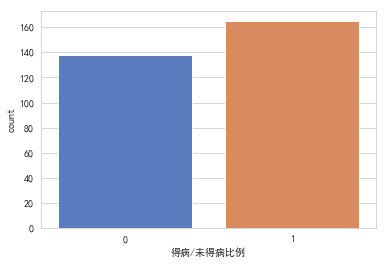

In [142]:
sns.countplot(x='target',data=df,palette="muted")
plt.xlabel("得病/未得病比例")

In [143]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

Text(0.5,0,'Sex (0 = 女, 1= 男)')

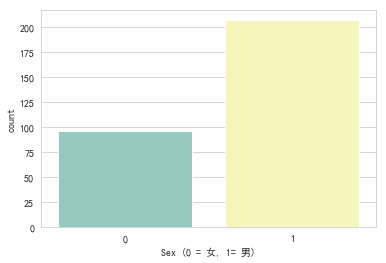

In [144]:
sns.countplot(x='sex',data=df,palette="Set3")
plt.xlabel("Sex (0 = 女, 1= 男)")

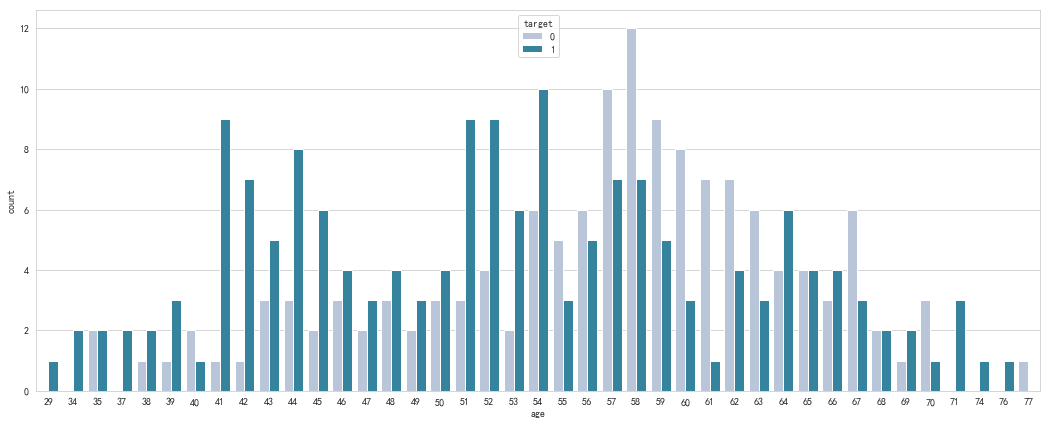

In [145]:
plt.figure(figsize=(18,7))
sns.countplot(x='age',data = df, hue = 'target',palette='PuBuGn',saturation=0.75)
plt.show()

### 数据观察部分先暂停 

## 数据处理 

### 对特征中非连续型数值特征进行处理

In [146]:
first = pd.get_dummies(df['cp'], prefix = "cp")
second = pd.get_dummies(df['slope'], prefix = "slope")
thrid = pd.get_dummies(df['thal'], prefix = "thal")

In [147]:
df = pd.concat([df,first,second,thrid], axis = 1)
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,1,0,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,1,0,0,0,0,1,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,1,0


In [148]:
df = df.drop(columns = ['cp', 'slope', 'thal'])
df.head(3)

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,1,0,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,1,0,0,0,0,1,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,1,0


In [149]:
y = df.target.values
X = df.drop(['target'], axis = 1)

In [150]:
X.shape

(303, 21)

## 模型创建 --Logistic Regression

In [151]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=6)

In [152]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train = standardScaler.transform(X_train)
X_test = standardScaler.transform(X_test) 

In [153]:
from sklearn.linear_model import LogisticRegression 

In [154]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [155]:
log_reg.score(X_train,y_train)

0.8810572687224669

In [156]:
log_reg.score(X_test,y_test)

0.8289473684210527

In [157]:
from sklearn.metrics import accuracy_score

In [158]:
#  等于:
y_predict_log = log_reg.predict(X_test)

# 调用accuracy_score计算分类准确度
accuracy_score(y_test,y_predict)

0.7236842105263158

In [159]:
param_grid = [
    {
        'C':[0.01,0.1,1,10,100],
        'penalty':['l2','l1'],
        'class_weight':['balanced',None]
    }
]

In [160]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(log_reg,param_grid,cv=10,n_jobs=-1)

In [161]:
%%time
grid_search.fit(X_train,y_train)

Wall time: 2.88 s


GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2', 'l1'], 'class_weight': ['balanced', None]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [162]:
grid_search.best_estimator_

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [163]:
grid_search.best_score_

0.8502202643171806

In [164]:
grid_search.best_params_

{'C': 0.01, 'class_weight': None, 'penalty': 'l2'}

In [165]:
y_predict_log = log_reg.predict(X_test)

In [166]:
accuracy_score(y_test,y_predict_log)

0.8289473684210527

In [167]:
log_reg = grid_search.best_estimator_
log_reg.score(X_test,y_test)

0.8289473684210527

In [168]:
from sklearn.metrics import f1_score

f1_score(y_test,y_predict_log)

0.8470588235294118

In [170]:
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve
print(classification_report(y_test,y_predict_log))

             precision    recall  f1-score   support

          0       0.87      0.75      0.81        36
          1       0.80      0.90      0.85        40

avg / total       0.83      0.83      0.83        76



In [171]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test,y_predict_log)
cnf_matrix

array([[27,  9],
       [ 4, 36]], dtype=int64)

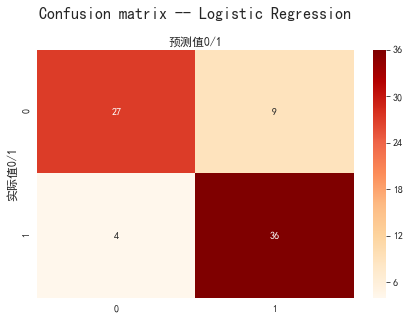

In [172]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'OrRd',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix -- Logistic Regression', y = 1.1,fontsize=16)
plt.ylabel('实际值0/1',fontsize=12)
plt.xlabel('预测值0/1',fontsize=12)
plt.show()

In [173]:
decision_scores = log_reg.decision_function(X_test)

In [174]:
from sklearn.metrics import precision_recall_curve

precisions,recalls,thresholds = precision_recall_curve(y_test,decision_scores)

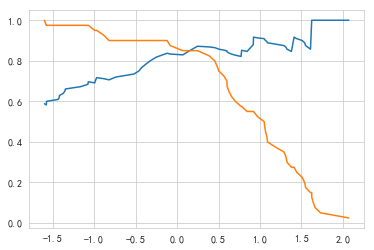

In [175]:
plt.plot(thresholds,precisions[:-1])
plt.plot(thresholds,recalls[:-1])
plt.show()    #没有从最小值开始取,sklearn自己从自己觉得ok的位置开始取

In [176]:
from sklearn.metrics import roc_curve

fprs,tprs,thresholds = roc_curve(y_test,decision_scores)

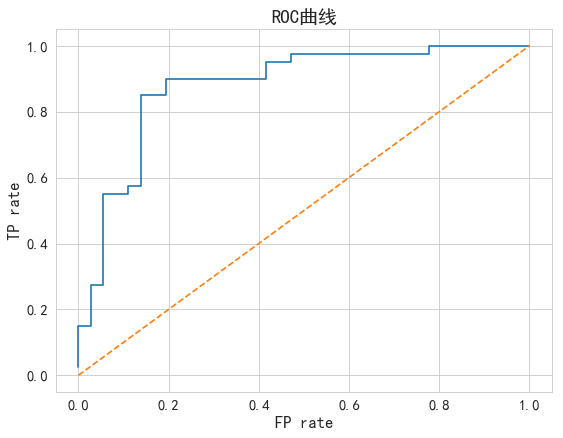

In [177]:
plt.figure(figsize=(8,6),dpi=80)
plt.plot(fprs,tprs)
plt.plot([0,1],linestyle='--')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel('TP rate',fontsize=15)
plt.xlabel('FP rate',fontsize=15)
plt.title('ROC曲线',fontsize=17)
plt.show()

In [179]:
# 求面积,相当于求得分
from sklearn.metrics import roc_auc_score  #auc:area under curve

roc_auc_score(y_test,decision_scores)

0.8784722222222222

## 模型创建--KNN临近算法

In [180]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [181]:
y_predict_knn = knn_clf.predict(X_test)

In [182]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_predict_knn)

0.8157894736842105

In [183]:
knn_clf.score(X_train,y_train)

0.8678414096916299

In [184]:
knn_clf.score(X_test,y_test)

0.8157894736842105

In [185]:
param_grid = [
    {
        'weights':['uniform'],
        'n_neighbors':[i for i in range(1,31)]
    },
    {
        'weights':['distance'],
        'n_neighbors':[i for i in range(1,31)],
        'p':[i for i in range(1,6)]
    }
]

In [186]:
%%time
knn_clf2 = KNeighborsClassifier()

grid_search = GridSearchCV(knn_clf2,param_grid)

grid_search.fit(X_train,y_train)

Wall time: 7.63 s


In [187]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=24, p=3,
           weights='distance')

In [188]:
grid_search.best_score_

0.8502202643171806

In [189]:
grid_search.best_params_

{'n_neighbors': 24, 'p': 3, 'weights': 'distance'}

In [190]:
knn_clf = grid_search.best_estimator_
knn_clf.score(X_train,y_train)

1.0

In [191]:
knn_clf.score(X_test,y_test)

0.8421052631578947

In [192]:
y_predict_knn = knn_clf3.predict(X_test)

In [193]:
from sklearn.metrics import f1_score

f1_score(y_test,y_predict_knn)

0.8536585365853658

In [195]:
print(classification_report(y_test,y_predict_knn))

             precision    recall  f1-score   support

          0       0.85      0.81      0.83        36
          1       0.83      0.88      0.85        40

avg / total       0.84      0.84      0.84        76



In [196]:
cnf_matrix = confusion_matrix(y_test,y_predict_knn)
cnf_matrix

array([[29,  7],
       [ 5, 35]], dtype=int64)

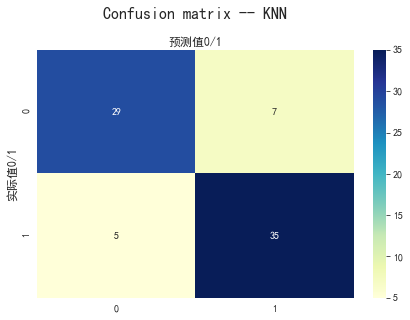

In [197]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix -- KNN', y = 1.1,fontsize=16)
plt.ylabel('实际值0/1',fontsize=12)
plt.xlabel('预测值0/1',fontsize=12)
plt.show()

In [198]:
y_probabilities = knn_clf.predict_proba(X_test)[:,1]

from sklearn.metrics import precision_recall_curve

precisions,recalls,thresholds = precision_recall_curve(y_test,y_probabilities)

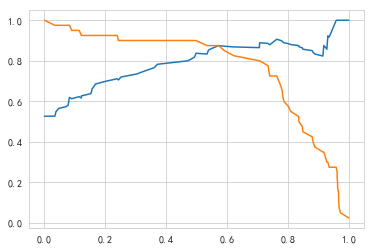

In [199]:
plt.plot(thresholds,precisions[:-1])
plt.plot(thresholds,recalls[:-1])
plt.show()    #没有从最小值开始取,sklearn自己从自己觉得ok的位置开始取

In [200]:
from sklearn.metrics import roc_curve

fprs2,tprs2,thresholds2 = roc_curve(y_test,y_probabilities)

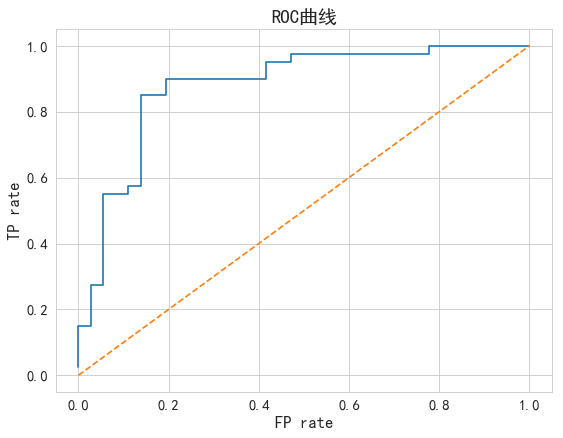

In [201]:
plt.figure(figsize=(8,6),dpi=80)
plt.plot(fprs,tprs)
plt.plot([0,1],linestyle='--')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel('TP rate',fontsize=15)
plt.xlabel('FP rate',fontsize=15)
plt.title('ROC曲线',fontsize=17)
plt.show()

In [202]:
# 求面积,相当于求得分
from sklearn.metrics import roc_auc_score  #auc:area under curve

roc_auc_score(y_test,y_probabilities)

0.8739583333333334

## 模型创建--DecisionTree

In [204]:
from sklearn.tree import DecisionTreeClassifier
dt_clf= DecisionTreeClassifier(random_state=6)

In [205]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {
        'max_features':['auto','sqrt','log2'],
        'min_samples_split':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],
        'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11]
    }
]
grid_search = GridSearchCV(dt_clf,param_grid)

grid_search.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=6,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [206]:
grid_search.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=8,
            min_weight_fraction_leaf=0.0, presort=False, random_state=6,
            splitter='best')

In [207]:
grid_search.best_score_

0.7929515418502202

In [208]:
grid_search.best_params_

{'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 8}

In [209]:
dt_clf = grid_search.best_estimator_
dt_clf.score(X_train,y_train)

0.8854625550660793

In [210]:
dt_clf.score(X_test,y_test)

0.7236842105263158

In [211]:
y_predict = dt_clf.predict(X_test)

In [212]:
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve
print(classification_report(y_test,y_predict))

             precision    recall  f1-score   support

          0       0.67      0.81      0.73        36
          1       0.79      0.65      0.71        40

avg / total       0.73      0.72      0.72        76



In [213]:
from sklearn.metrics import f1_score

f1_score(y_test,y_predict)

0.7123287671232875

In [214]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test,y_predict)
cnf_matrix

array([[29,  7],
       [14, 26]], dtype=int64)

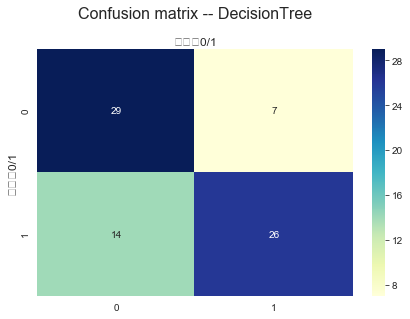

In [215]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix -- DecisionTree', y = 1.1,fontsize=16)
plt.ylabel('实际值0/1',fontsize=12)
plt.xlabel('预测值0/1',fontsize=12)
plt.show()

In [216]:
y_probabilities = dt_clf.predict_proba(X_test)[:,1]

from sklearn.metrics import precision_recall_curve

precisions,recalls,thresholds = precision_recall_curve(y_test,y_probabilities)

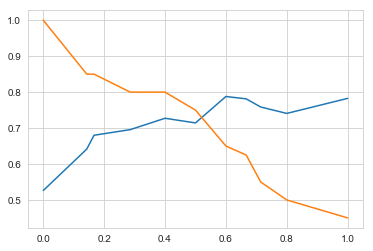

In [217]:
plt.plot(thresholds,precisions[:-1])
plt.plot(thresholds,recalls[:-1])
plt.show()    #没有从最小值开始取,sklearn自己从自己觉得ok的位置开始取

In [218]:
from sklearn.metrics import roc_curve

fprs3,tprs3,thresholds3 = roc_curve(y_test,y_probabilities)

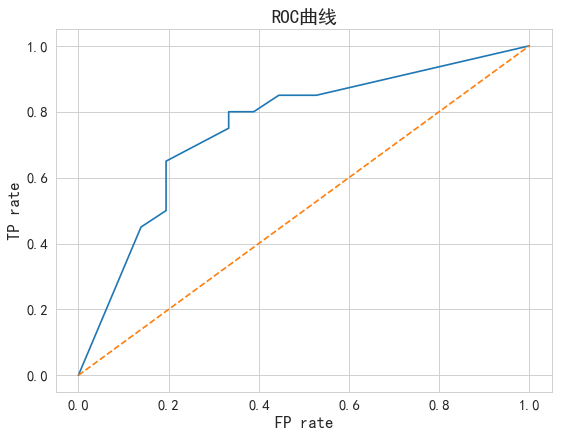

In [221]:
plt.figure(figsize=(8,6),dpi=80)
plt.plot(fprs3,tprs3)
plt.plot([0,1],linestyle='--')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel('TP rate',fontsize=15)
plt.xlabel('FP rate',fontsize=15)
plt.title('ROC曲线',fontsize=17)
plt.show()

In [222]:
# 求面积,相当于求得分
from sklearn.metrics import roc_auc_score  #auc:area under curve

roc_auc_score(y_test,y_probabilities)

0.7527777777777778

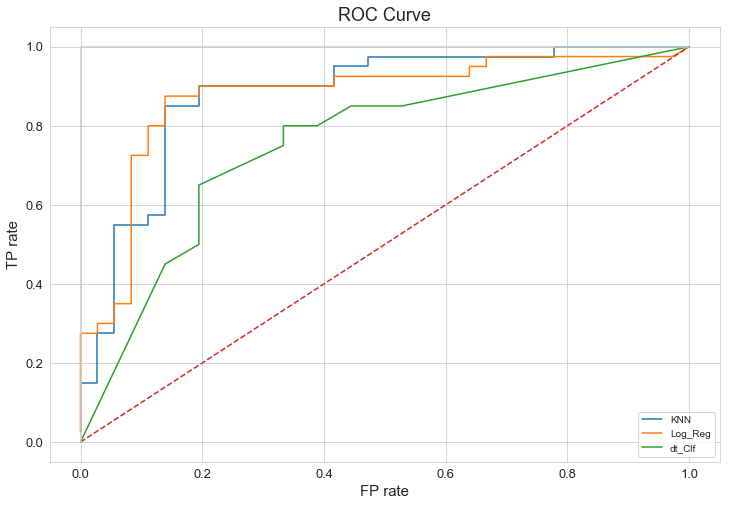

In [223]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
plt.title('ROC Curve',fontsize=18)
plt.plot(fprs,tprs,label='KNN')
plt.plot(fprs2,tprs2,label='Log_Reg')
plt.plot(fprs3,tprs3,label='dt_Clf')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.8')
plt.plot([1,1],c='.8')
plt.ylabel('TP rate',fontsize=15)
plt.xlabel('FP rate',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()
plt.show()

# model ensemble

In [287]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[
        ('log_clf',log_reg),
        ('knn_clf',knn_clf),
],voting='soft')

In [288]:
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('log_clf', LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('knn_clf', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=24, p=3,
           weights='distance'))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [289]:
voting_clf.score(X_test,y_test)

F:\software\anaconda\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8421052631578947

In [290]:
y_probabilities = voting_clf.predict_proba(X_test)[:,1]

roc_auc_score(y_test,y_probabilities)

0.875

## Bagging

In [275]:
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(log_reg,
                               n_estimators=500,max_samples=100,   # n_estimators 形成多少个子模型
                               bootstrap=True,oob_score=True)                     # max_samples  每个子模型要看多少个数据
                                                                   # bootstrap    放回取样

In [276]:
# bagging_clf.fit(X_train,y_train)
# bagging_clf.score(X_test,y_test)
bagging_clf.fit(X,y)
bagging_clf.oob_score_

0.7128712871287128

In [278]:
y_probabilities = bagging_clf.predict_proba(X_test)[:,1]

roc_auc_score(y_test,y_probabilities)

0.8826388888888889

In [270]:

bagging_clf = BaggingClassifier(knn_clf,
                               n_estimators=200,max_samples=50,   # n_estimators 形成多少个子模型
                               bootstrap=True,oob_score=True)                     # max_samples  每个子模型要看多少个数据
                                                                   # bootstrap    放回取样

In [271]:
bagging_clf.fit(X,y)
bagging_clf.oob_score_

0.6270627062706271

In [274]:
y_probabilities = bagging_clf.predict_proba(X_test)[:,1]

roc_auc_score(y_test,y_probabilities)

0.5868055555555556

## RondomForest

In [260]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=500,random_state=666,oob_score=True,n_jobs=-1)
rf_clf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=True, random_state=666, verbose=0, warm_start=False)

In [261]:
rf_clf.oob_score_

0.8118811881188119

In [279]:
y_probabilities = rf_clf.predict_proba(X_test)[:,1]

roc_auc_score(y_test,y_probabilities)

0.9288194444444444

In [280]:
y_probabilities = rf_clf.predict_proba(X)[:,1]

roc_auc_score(y,y_probabilities)

1.0

In [281]:
rf_clf2 = RandomForestClassifier(n_estimators=500,max_leaf_nodes=16,random_state=666,oob_score=True,n_jobs=-1)
rf_clf2.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=16,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=True, random_state=666, verbose=0, warm_start=False)

In [283]:
rf_clf2.oob_score_

0.8316831683168316

In [284]:
y_probabilities = rf_clf2.predict_proba(X_test)[:,1]

roc_auc_score(y_test,y_probabilities)

0.8954861111111111

In [286]:
y_probabilities = rf_clf2.predict_proba(X)[:,1]

roc_auc_score(y,y_probabilities)

0.9757136583223539